In [1]:
import tweepy

In [6]:
## import the libraries
import tweepy, codecs

## fill in your Twitter credentials 
consumer_key = 'Zs73YtjjBGro28vuBixn2g'
consumer_secret = 'NAp2bqrp8YqPyfzkMmYbXKdEesOzTK5k1t0SwLZdA'
access_token = '255922982-JhOdVMPjyOxFIIsLOZgkN04nXeqCl6FHAniG4xjb'
access_token_secret = 'K61tg1XNv1QP7qkft8beFtzNXMBybRsRGPtBoHzhogoCf'

## let Tweepy set up an instance of the REST API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

## fill in your search query and store your results in a variable
results = api.search(q = "telia", lang = "et", result_type = "recent", count = 1000)

## use the codecs library to write the text of the Tweets to a .txt file
file = codecs.open("telia_twitter_ee.txt", "w", "utf-8")
for result in results:
	file.write(result.text)
	file.write("\n")
file.close()

In [7]:
from aylienapiclient import textapi

In [8]:
from aylienapiclient import textapi
client = textapi.Client("a47c98fc", "06de1474bb8ade2bb66e47b55ad7d69f")
sentiment = client.Sentiment({'text': 'Internet'})
print(sentiment)

{'polarity': 'neutral', 'subjectivity': 'subjective', 'text': 'Internet', 'polarity_confidence': 0.44959160685539246, 'subjectivity_confidence': 0.9889165600601634}


In [11]:
from aylienapiclient import textapi
import csv, io

## Initialize a new client of AYLIEN Text API
client = textapi.Client("a47c98fc", "06de1474bb8ade2bb66e47b55ad7d69f")

with io.open('telia_twitter_eng.csv', 'w', encoding='utf8', newline='') as csvfile:
	csv_writer = csv.writer(csvfile)
	csv_writer.writerow(["Tweet", "Sentiment"])
	with io.open("telia_twitter_en.txt", 'r', encoding='utf8') as f:
	    for tweet in f.readlines():
	    	## Remove extra spaces or newlines around the text
	    	tweet = tweet.strip()

	    	## Reject tweets which are empty so you don’t waste your API credits
	    	if len(tweet) == 0:
	    		print('skipped')
	    		continue
	    	
	    	print(tweet)

	    	## Make call to AYLIEN Text API
	    	sentiment = client.Sentiment({'text': tweet})

	    	## Write the sentiment result into csv file
	    	csv_writer.writerow([sentiment['text'], sentiment['polarity']])

@ryan3levis Telia park is the stadium :)
@B_Gliese That's great mate, nice one! What about from Telia Park to the central stadium? Match over at half 9ish,… https://t.co/nu3BE84uh5
RT @The2019Seniors: 2 MONDAYS TO HALLOWEEN 🎃🍫
6 MONDAYS TO THANKSGIVING 🍗❄️
10 MONDAYS TO CHRISTMAS 🎄🎁
11 MONDAYS TO NEW YEARS 🎉🔥
25 MONDAY…
Telia Agrees to Pay $1 Billion in Penalties in Uzbek Corruption Scandal Settlement https://t.co/h9m0oadpgE https://t.co/lE98vb93Ox
RT @Holy_Mowgli: 🎶welcome 2 mycology we give fungus names
zygospores alkaloids apical membranes
we find whatevr u may need
flagella telia u…
Telia Carrier launches new Internet backbone PoP in Berlin, bringing much-needed high speed, low latency connect... https://t.co/nQ4EH1UoS4
@teliafinland Is this a joke?! You're saying entire Internet authorised to send e-mail 'from' telia.fi? You realise… https://t.co/1ze29hgDwH
i really hope Telia Tequila found love
@TeliaSverige leads in Swedish mobile market... via @mobileeurope https://t.co/F4ZDX4l

HttpError: <HttpError 429 when requesting https://api.aylien.com/api/v1/sentiment returned "">

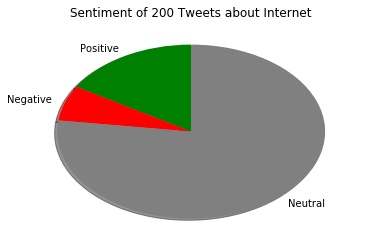

In [16]:
## import the libraries
import matplotlib.pyplot as plt 
import pandas as pd
from collections import Counter
import csv 

## open up your csv file with the sentiment results
with open('telia_twitter_eng.csv', 'r', encoding = 'utf8') as csvfile:
## use Pandas to read the “Sentiment” column,
        df = pd.read_csv(csvfile)
sent = df["Sentiment"]

## use Counter to count how many times each sentiment appears
## and save each as a variable
counter = Counter(sent)
positive = counter['positive']
negative = counter['negative']
neutral = counter['neutral']

## declare the variables for the pie chart, using the Counter variables for “sizes”
labels = 'Positive', 'Negative', 'Neutral'
sizes = [positive, negative, neutral]
colors = ['green', 'red', 'grey']
yourtext = "Internet"

## use matplotlib to plot the chart
plt.pie(sizes, labels = labels, colors = colors, shadow = True, startangle = 90)
plt.title("Sentiment of 200 Tweets about "+yourtext)
plt.show()